In [213]:
import numpy as np
from numpy import *
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib.patches import Patch

In [214]:
import seaborn as sns
import cycler 
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MaxNLocator

In [215]:
#Reads the csv file containing rawdata
data = pd.read_csv("all_lysates_p70.csv")
#Prints first 5 rows of the dataframe
data.tail(5) 

,Time(min),1,2,3,4,5,6,7,8,9,10,11,12
356,712,23208,24552,19993,13467,14705,14147,523,479,480,3305,3530,3284
357,714,23313,24512,20082,13518,14592,14256,525,485,496,3294,3442,3336
358,716,23339,24733,20097,13586,14701,14017,524,484,483,3322,3468,3335
359,718,23206,24918,20108,13513,14869,14216,513,481,466,3294,3522,3318
360,720,23275,24732,20136,13568,14863,14256,533,469,490,3297,3467,3312


In [216]:
#Equation to convert RFU into GFP(uM) terms. It comes from the GFP Standards titration curve (done by Sarah at gain 50)
#def converter(Y):
    #return ((Y + 459.57977839)/3127.11795937)
def converter(Y):
    return ((Y + 217.47)/1854.8)

#IMPORTANT!
#Only run this code block one-time otherwise the data will run through the 'converter' function multiple times. If you ran it multiple times, go to the previous codeblock and run it again.  
N= 12 #No. of samples
data.update(converter(data.iloc[:, 1:N+1]))
data.head(5)

,Time(min),1,2,3,4,5,6,7,8,9,10,11,12
0,0,0.149057,0.152830,0.146361,0.144204,0.142587,0.144743,0.143126,0.136656,0.142587,0.172779,0.170083,0.169544
1,2,0.147978,0.149057,0.146361,0.145822,0.143665,0.145822,0.142587,0.136656,0.135578,0.169544,0.165770,0.170083
2,4,0.149596,0.152291,0.149057,0.149596,0.144743,0.148517,0.139352,0.133961,0.136656,0.170083,0.168466,0.163613
3,6,0.149057,0.148517,0.147439,0.141509,0.151752,0.149057,0.137195,0.138813,0.132882,0.164692,0.167387,0.166848
4,8,0.155526,0.150674,0.153370,0.158222,0.154987,0.151752,0.138813,0.139352,0.136656,0.171161,0.166309,0.168466


In [217]:
#This codeblock calculates the mean of sample replicates 
data["L1_mean"] = np.nan  #New blank columns for inserting mean values 
data["L2_mean"] = np.nan  #New blank columns for inserting mean values
data["L3_mean"] = np.nan  #New blank columns for inserting mean values
data["L4_mean"] = np.nan  #New blank columns for inserting mean values
#data["T7_mean"] = np.nan  #New blank columns for inserting mean values 
#data["15"] = np.nan  #New blank columns for inserting mean values 
#data["16"] = np.nan  #New blank columns for inserting mean values 

for x in range(1,740):
   data.iloc[x-1:x, 13:14] = mean([data.iloc[x-1:x, 1:3]])  #data["sigma_mean"]
for x in range(1,740):
    data.iloc[x-1:x, 14:15] = mean([data.iloc[x-1:x, 4:6]])  #data["14"]
for x in range(1,740):
   data.iloc[x-1:x, 15:16] = mean([data.iloc[x-1:x, 7:10]])  #data["15"]
for x in range(1,740):
    data.iloc[x-1:x, 16:17] = mean([data.iloc[x-1:x, 10:13]]) #data["16"]

data.head(5) 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Time(min),1,2,3,4,5,6,7,8,9,10,11,12,L1_mean,L2_mean,L3_mean,L4_mean
0,0,0.149057,0.152830,0.146361,0.144204,0.142587,0.144743,0.143126,0.136656,0.142587,0.172779,0.170083,0.169544,0.150943,0.143396,0.140790,0.170802
1,2,0.147978,0.149057,0.146361,0.145822,0.143665,0.145822,0.142587,0.136656,0.135578,0.169544,0.165770,0.170083,0.148517,0.144743,0.138274,0.168466
2,4,0.149596,0.152291,0.149057,0.149596,0.144743,0.148517,0.139352,0.133961,0.136656,0.170083,0.168466,0.163613,0.150943,0.147170,0.136656,0.167387
3,6,0.149057,0.148517,0.147439,0.141509,0.151752,0.149057,0.137195,0.138813,0.132882,0.164692,0.167387,0.166848,0.148787,0.146630,0.136297,0.166309
4,8,0.155526,0.150674,0.153370,0.158222,0.154987,0.151752,0.138813,0.139352,0.136656,0.171161,0.166309,0.168466,0.153100,0.156604,0.138274,0.168645


In [218]:
#This codeblock calculates the standard deviation between sample replicates 
data["L1_std"] = np.nan  #New blank columns for inserting std deviation values 
data["L2_std"] = np.nan  #New blank columns for inserting std deviation values 
data["L3_std"] = np.nan  #New blank columns for inserting std deviation values 
data["L4_std"] = np.nan  #New blank columns for inserting std deviation values 

for x in range(1,740):
    data.iloc[x-1:x, 17:18] = std([data.iloc[x-1:x, 1:3]])  #data["17"]
for x in range(1,740):
    data.iloc[x-1:x, 18:19] = std([data.iloc[x-1:x, 4:7]])  #data["18"]
for x in range(1,740):
    data.iloc[x-1:x, 19:20] = std([data.iloc[x-1:x, 7:10]])  #data["19"]
for x in range(1,740):
    data.iloc[x-1:x, 20:21] = std([data.iloc[x-1:x, 10:13]]) #data["20"]

data.head(5) 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Time(min),1,2,3,4,5,6,7,8,9,...,11,12,L1_mean,L2_mean,L3_mean,L4_mean,L1_std,L2_std,L3_std,L4_std
0,0,0.149057,0.152830,0.146361,0.144204,0.142587,0.144743,0.143126,0.136656,0.142587,...,0.170083,0.169544,0.150943,0.143396,0.140790,0.170802,0.001887,0.000916,0.002931,0.001415
1,2,0.147978,0.149057,0.146361,0.145822,0.143665,0.145822,0.142587,0.136656,0.135578,...,0.165770,0.170083,0.148517,0.144743,0.138274,0.168466,0.000539,0.001017,0.003081,0.001919
2,4,0.149596,0.152291,0.149057,0.149596,0.144743,0.148517,0.139352,0.133961,0.136656,...,0.168466,0.163613,0.150943,0.147170,0.136656,0.167387,0.001348,0.002080,0.002201,0.002749
3,6,0.149057,0.148517,0.147439,0.141509,0.151752,0.149057,0.137195,0.138813,0.132882,...,0.167387,0.166848,0.148787,0.146630,0.136297,0.166309,0.000270,0.004336,0.002503,0.001165
4,8,0.155526,0.150674,0.153370,0.158222,0.154987,0.151752,0.138813,0.139352,0.136656,...,0.166309,0.168466,0.153100,0.156604,0.138274,0.168645,0.002426,0.002641,0.001165,0.001985


In [219]:
#data.rename(columns={"I10":"Negative Control"},inplace =True)

#data.head(5) 

In [220]:
Time = data['Time(min)'].values/60 # Time in hours
NUMBEROFCURVES = 4  #No of curves

In [221]:
def formatplot(ax,xlabel=False,ylabel=False,title=False,
               xlim=False,ylim=False, xticks=False, yticks=False,
               logx=False,logy=False,logxy=False,symlogx=False,
               padx=12,pady=12,
               lw=1.5):

    # This is a helper function to easily set plot properties. 
    # You can write your own or add this code directly to the plot call.
    
    ######### SET TITLES AND LABLES #########

    if title:
        ax.set_title("Sigma_70")
    if xlabel:
        ax.set_xlabel("Time", labelpad=padx)
    if ylabel:    
        ax.set_ylabel("GFP Concentration", labelpad=pady)

    ######### SET AXES LIMITS #########

    if xlim:
        ax.set_xlim(720)
    if ylim:
        ax.set_ylim(30)

    ######### SET TICK VALUES #########
    
    if xticks:
        ax.set_xticks(1)
    if yticks:
        ax.set_yticks(2)

    ######### SET LINE THICKNESSES #########

    ax.spines['bottom'].set_linewidth(1)
    ax.spines['top'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1) 

    ######### SET TICKS #########

    if logx==True:

        ax.set_xscale("log")

    elif logy==True:

        ax.set_yscale("log")

    elif logxy==True:

        ax.set_xscale("log")
        ax.set_yscale("log")
    
    elif symlogx==True:

        ax.set_xscale("symlog",linthreshx=1e-4)
        ax.set_yscale("log")

    else:
        minorLocatorx=AutoMinorLocator(2) # Number of minor intervals per major interval
        minorLocatory=AutoMinorLocator(2)
        ax.xaxis.set_minor_locator(minorLocatorx)
        ax.yaxis.set_minor_locator(minorLocatory)

    ax.tick_params(which='major', width=lw, length=8, pad=9,direction='in',top='on',right='on')
    ax.tick_params(which='minor', width=lw, length=4, pad=9,direction='in',top='on',right='on')

<function matplotlib.pyplot.show(close=None, block=None)>

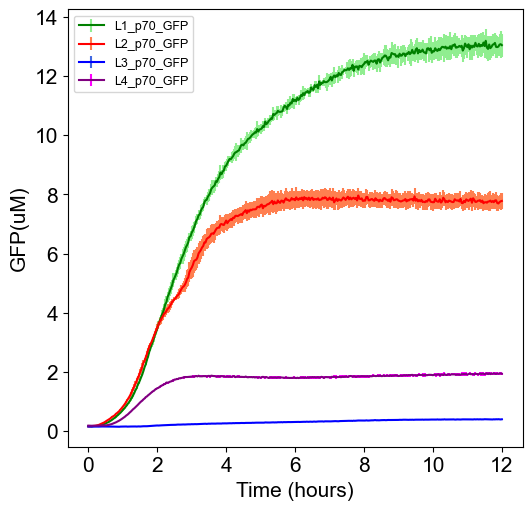

In [222]:
# 3. Plot timeseries
# 3.1 Define global plot parameters
plt.close("all")
DPI=1200
figure_options={'figsize':(8.27,5.83)} #figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'15','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)
LINEWIDTH = 1.5
MARKERSIZE = 5

# 3.4 Call plots
f, ax=plt.subplots()
plt.subplots_adjust(left=0.2,bottom=0.2,right=0.75,top=0.95) # Set size of plot precisely


plt.errorbar(Time, data["L1_mean"], color= 'green', yerr=data["L1_std"],ecolor='lightgreen', label="L1_p70_GFP");
plt.errorbar(Time, data["L2_mean"], color='red', yerr=data["L2_std"], ecolor='coral', label="L2_p70_GFP");
plt.errorbar(Time, data["L3_mean"], color= 'blue', yerr=data["L3_std"], ecolor='royalblue', label="L3_p70_GFP")
plt.errorbar(Time, data["L4_mean"], color='purple', yerr=data["L4_std"], ecolor='fuchsia', label="L4_p70_GFP");


plt.ylabel('GFP(uM)')
plt.xlabel('Time (hours)')
plt.legend(loc="best", prop={'size': 9})
plt.savefig('./all_lysates_p70_GFP.png',dpi=DPI,transparent=True, bbox_inches='tight')
plt.show